In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("train.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Basic information about the dataset and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#sample of dataset
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
247,248,20,RL,75.0,11310,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,140000
1253,1254,60,RL,NaN,17542,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,294000
1084,1085,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,187500
1042,1043,120,RL,34.0,5381,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,196000
221,222,60,RL,NaN,8068,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,ConLI,Normal,200000


In [ ]:
#Find duplicated
df.duplicated().sum()

np.int64(0)

In [ ]:
#sum of missing data for each column
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

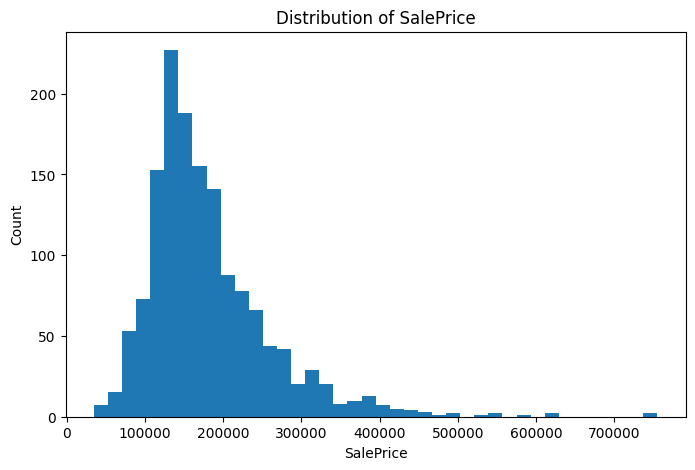

In [ ]:
#Distribution of the label
plt.figure(figsize=(8, 5))
plt.hist(df["SalePrice"], bins=40)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.title("Distribution of SalePrice")
plt.show()

In [ ]:
#Not all house need to have two basement type
df[df["BsmtFinType1"].notna() & df["BsmtFinType2"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000


In [ ]:
# Investigate why BsmtExposure is NaN despite a basement existing:
# the basement is unfinished
df[df["BsmtExposure"].isna() & df["BsmtFinType2"].notna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [13]:
# ======================= Missing Value Interpretation Summary =======================
# LotFrontage (1201 non-null):
#   Length of land bordering the street; missing values indicate frontage is unknown
#   or difficult to measure (e.g., irregular or corner lots), not lack of street access.
#
# Alley (91 non-null):
#   Missing values indicate no alley access, as defined in the data description.
#
# MasVnrType (588 non-null) and MasVnrArea (1452 non-null):
#   Missing values indicate no masonry veneer; veneer area should be interpreted as zero.
#
# Basement features:
#   BsmtQual, BsmtCond, BsmtFinType1 (1423 non-null)
#   BsmtExposure, BsmtFinType2 (1422 non-null)
#   Missing values indicate no basement or not applicable.
#   BsmtFinType1 and BsmtFinType2 do not need to both be present, as houses may have
#   only one finished basement area.
#   One missing value in BsmtExposure corersponds to a house with an unfinished basement.
#
# Garage features:
#   GarageYrBlt, GarageType, GarageQual, GarageCond, GarageFinish (1379 non-null)
#   Missing values indicate no garage.
#
# Electrical (1 missing value):
#   All houses should have electricity; the missing value is likely a data entry error.
#
# FireplaceQu (770 non-null):
#   Missing values indicate no fireplace.
#
# PoolQC (7 non-null):
#   Missing values indicate no pool.
#
# Fence (281 non-null):
#   Missing values indicate no fence.
#
# MiscFeature (54 non-null):
#   Missing values indicate no miscellaneous features.
# ==============================================================================

In [6]:
def fill_missing(df):
    """
    Fill missing values for categorical and numerical columns.
    """
    # Categorical columns to fill with "None"
    cat_cols = [
        "Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure",
        "BsmtFinType1","BsmtFinType2","FireplaceQu","PoolQC",
        "Fence","MiscFeature","GarageYrBlt","GarageType",
        "GarageQual","GarageCond","GarageFinish",
        "KitchenQual"
    ]

    # Numerical columns to fill with 0
    num_cols = [
        "BsmtHalfBath","BsmtFullBath","GarageArea",
        "BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","MasVnrArea"
    ]

    # Fill LotFrontage by median within Neighborhood
    if "LotFrontage" in df.columns:
        df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"]\
                              .transform(lambda x: x.fillna(x.median()))

    # Fill Electrical with mode
    if "Electrical" in df.columns:
        df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

    # Fill Utilities with mode within Neighborhood
    if "Utilities" in df.columns:
        df["Utilities"] = df.groupby("Neighborhood")["Utilities"]\
                             .transform(lambda x: x.fillna(x.mode()[0]))

    # Fill Exterior1st and Exterior2nd with mode within Neighborhood
    for col in ["Exterior1st", "Exterior2nd"]:
        if col in df.columns:
            df[col] = df.groupby("Neighborhood")[col]\
                        .transform(lambda x: x.fillna(x.mode()[0]))

    # Fill categorical columns with "None"
    df[cat_cols] = df[cat_cols].fillna("None")

    # Fill numerical columns with 0
    df[num_cols] = df[num_cols].fillna(0)

    return df
df=fill_missing(df)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

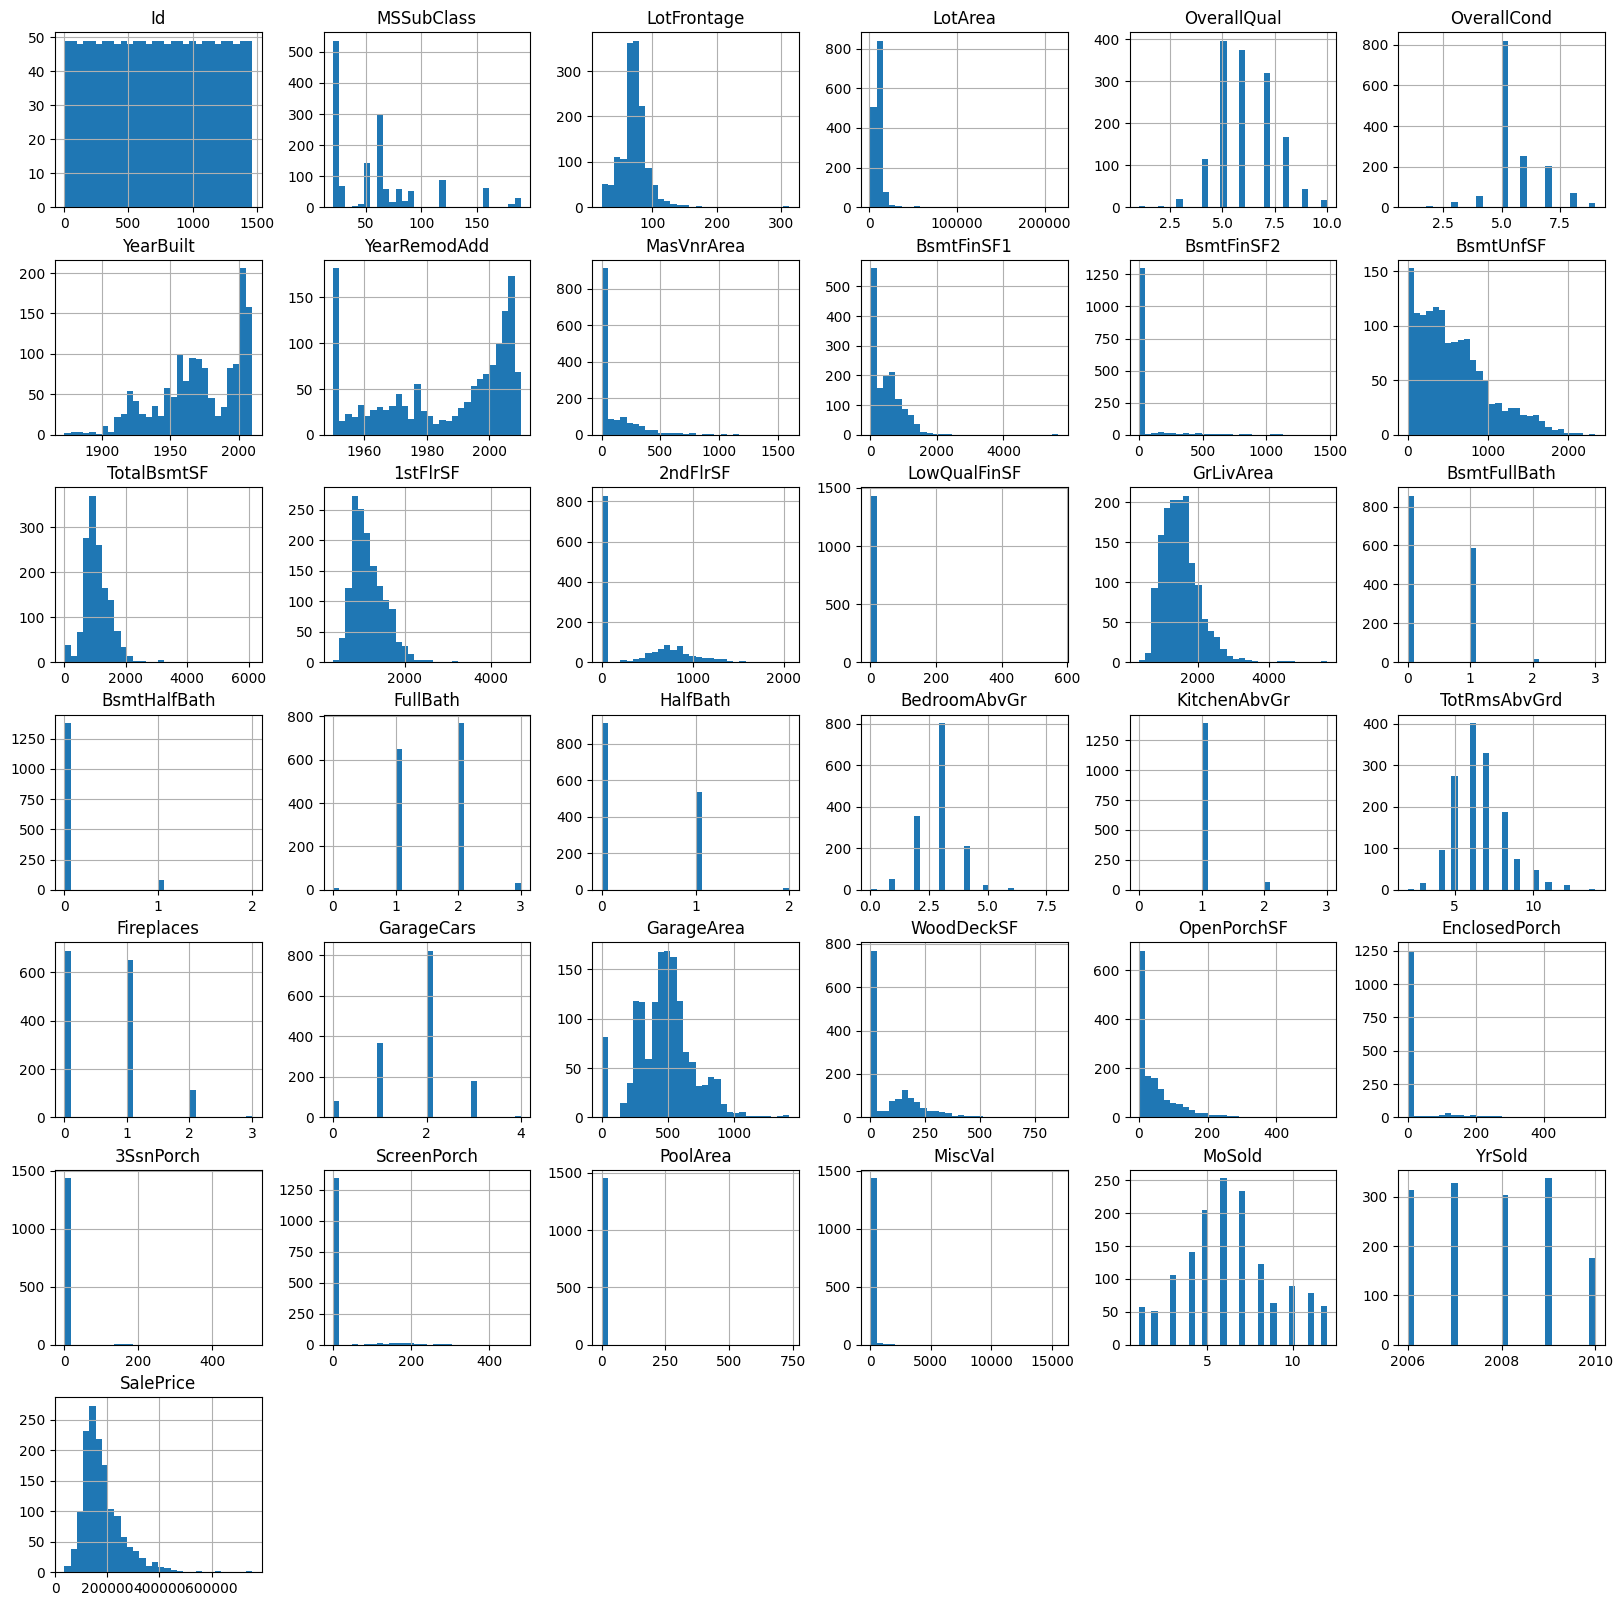

In [7]:
#Looking at the distribution of numeric columns, most of them are right skewed
num_cols = df.select_dtypes(include="number").columns
df[num_cols].hist(figsize=(20, 20), bins=30)

In [ ]:
#basic information of categorical columns
df.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,98,4,6,6,3,4,5,5,9,6
top,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,None,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1335,735,1360,690,870,81,605,1311,1326,1340,1453,1179,1406,1267,1198


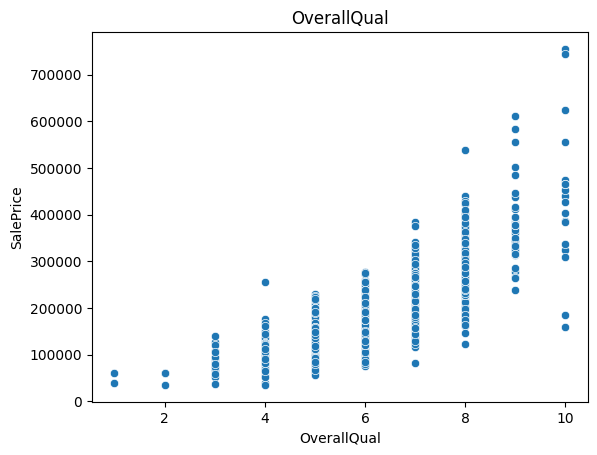

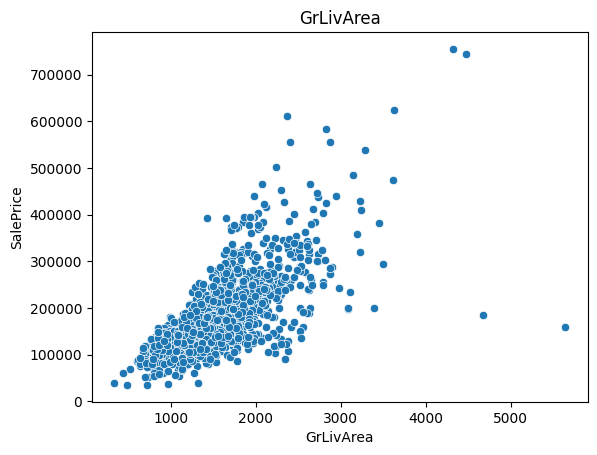

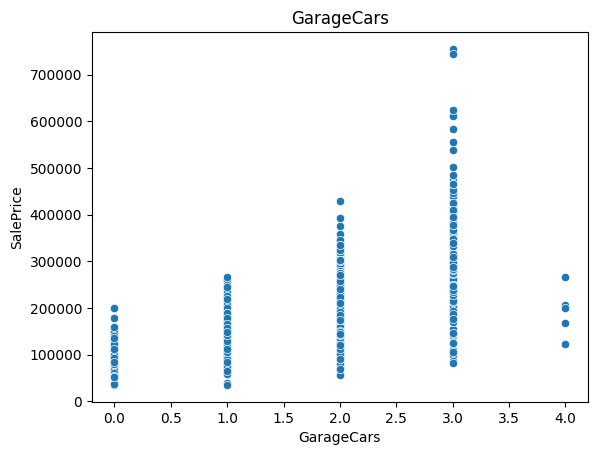

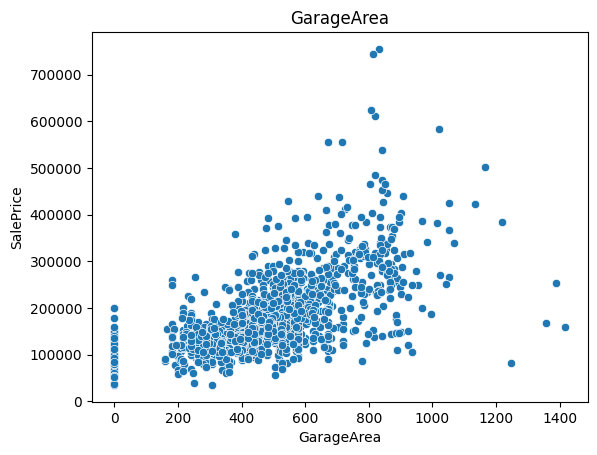

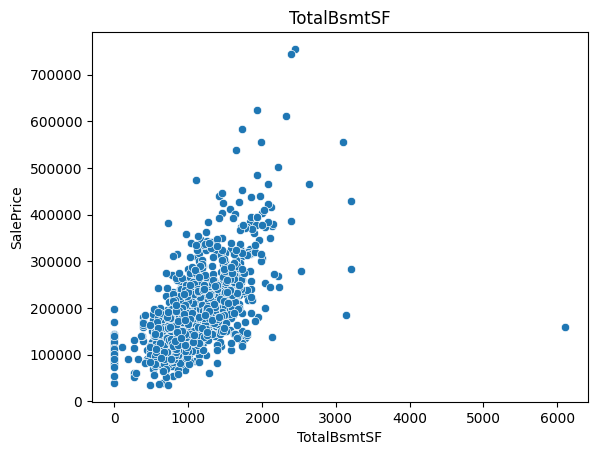

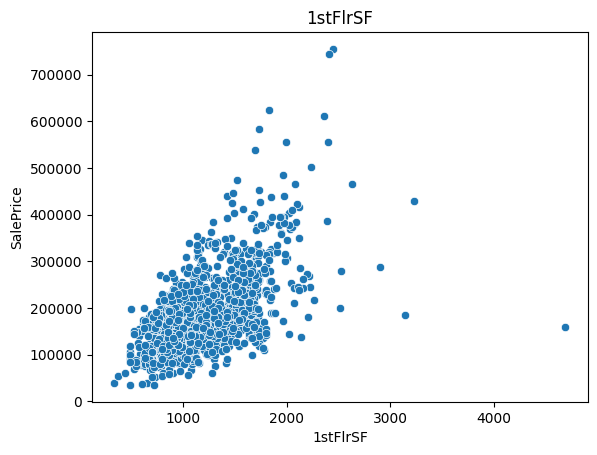

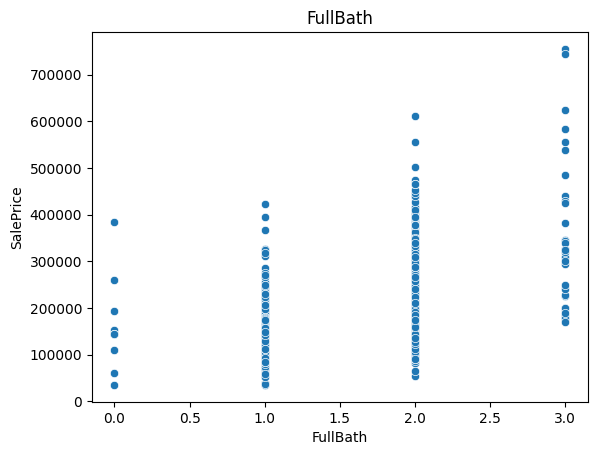

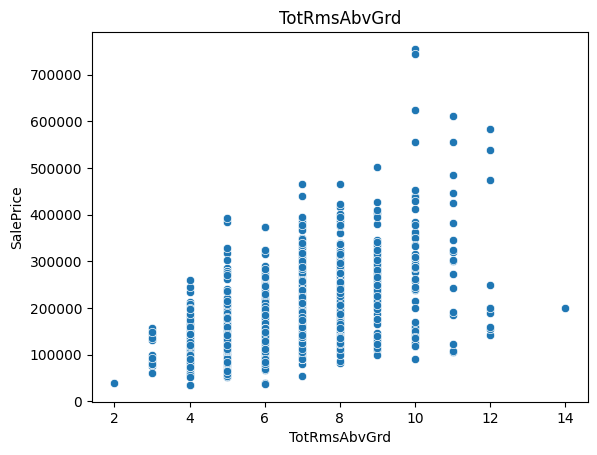

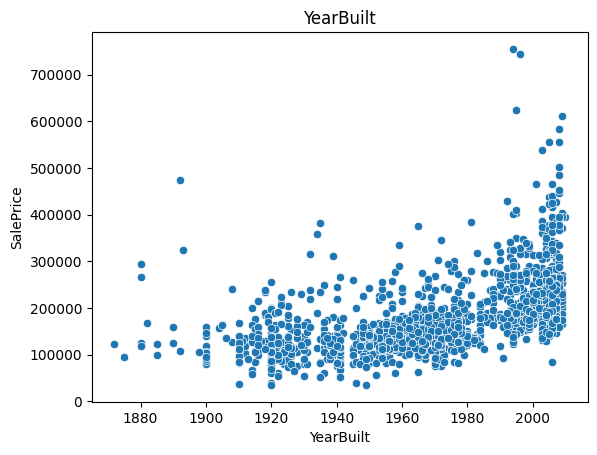

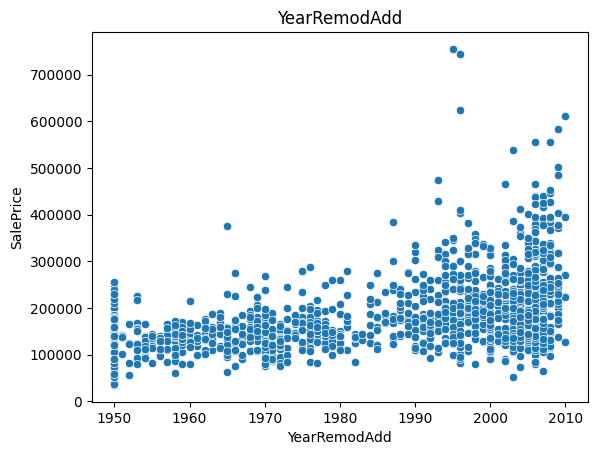

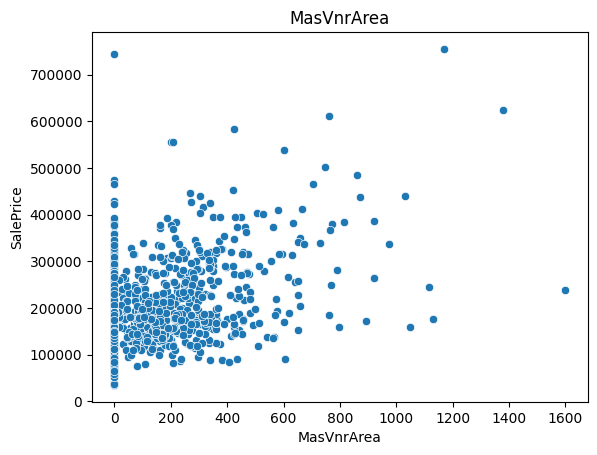

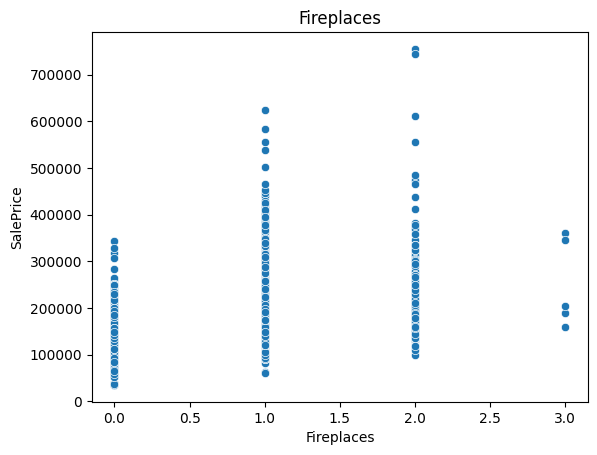

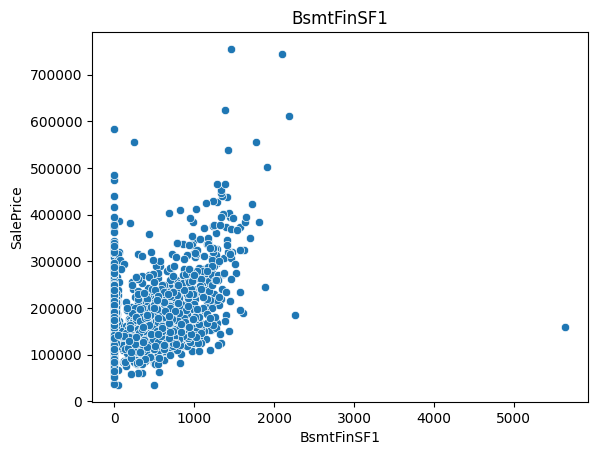

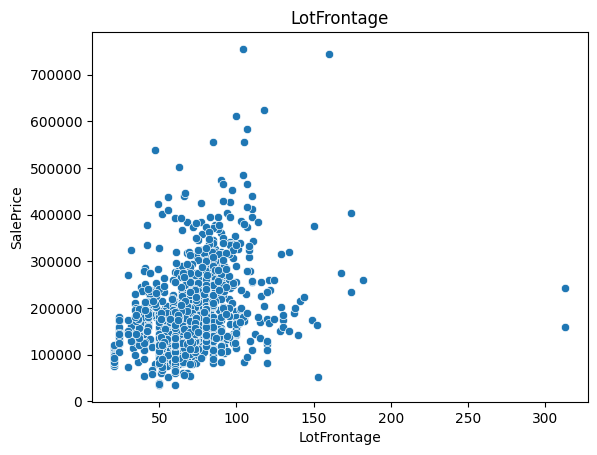

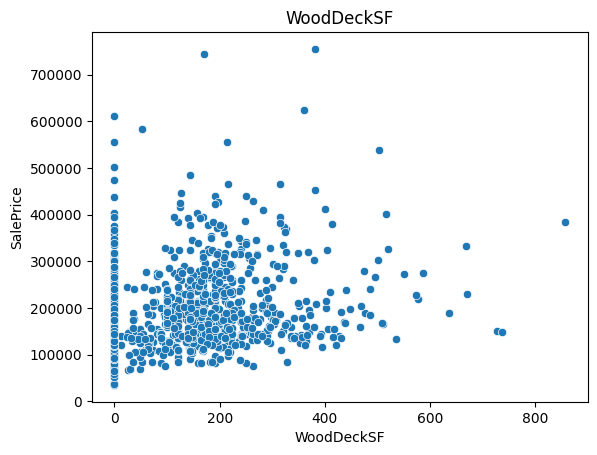

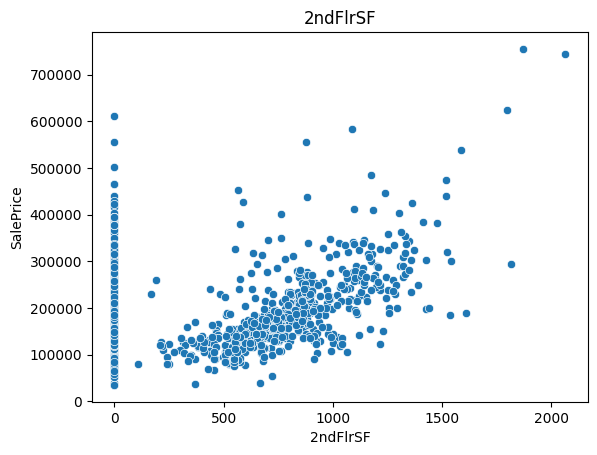

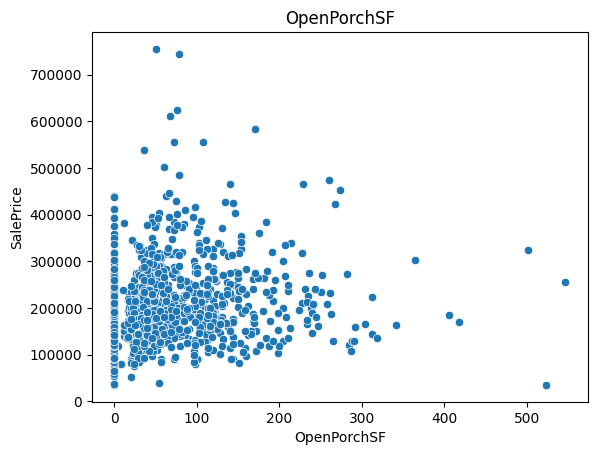

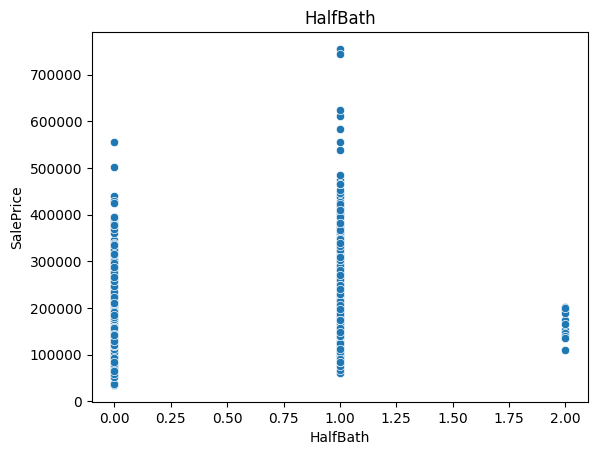

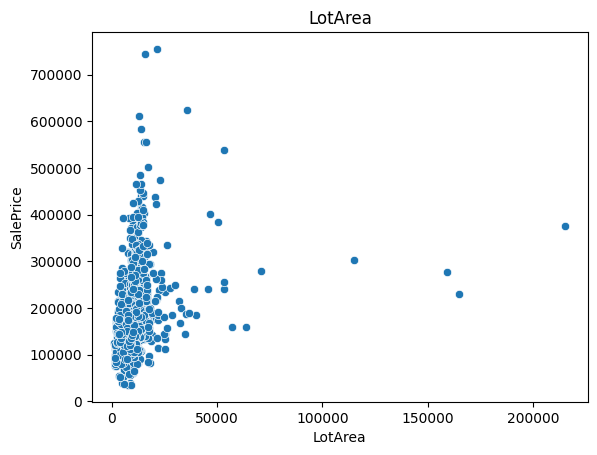

In [ ]:
#Top 20 features that correlate with SalePrice
corr = df.corr(numeric_only=True)["SalePrice"].abs()
top_num = corr.sort_values(ascending=False).head(20)
for col in top_num.index:
    if col != "SalePrice":
        sns.scatterplot(x=df[col], y=df["SalePrice"])
        plt.title(col)
        plt.show()


In [ ]:
#Find columns that have high correlation to each other (in case of feature engineering or dropping to prevent multicolinearity)
import numpy as np
# Only numeric columns
num_cols = df.select_dtypes(include="number").columns

# n x n correlation matrix
corr_matrix = df[num_cols].corr()

abs_corr = corr_matrix.abs()

np.fill_diagonal(abs_corr.values, 0)

# Find the max correlation
max_corr = abs_corr.unstack().sort_values(ascending=False).drop_duplicates()
print(max_corr.head(10))


GarageArea    GarageCars      0.882475
TotRmsAbvGrd  GrLivArea       0.825489
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
              2ndFlrSF        0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
GarageCars    SalePrice       0.640409
FullBath      GrLivArea       0.630012
dtype: float64


In [ ]:
#Inspection of test dataset
test_df=pd.read_csv("test.csv")

In [ ]:

test_df.duplicated().sum()

np.int64(0)

In [ ]:
#some missing columns that are not presented in train dataset
test_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
#House with no basement
test_df[test_df["TotalBsmtSF"].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
